In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plot style
sns.set_style("darkgrid")


In [3]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()  # this will open a file chooser dialog

# Read CSV into pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Uploaded file: {filename}")

# Show first 5 rows
df.head()

Saving game_data.csv to game_data (1).csv
Uploaded file: game_data (1).csv


,Category,Metric,Value
0,Player Stats,Bullets Fired,343
1,Player Stats,Hits,109
2,Player Stats,Lives Lost,2
3,Enemy Stats,Enemies Spawned,134
4,Enemy Stats,Enemies Destroyed,109


In [4]:
df.isnull().sum()


,0
Category,0
Metric,0
Value,0


Time Played: 78.83 seconds
Final Score: 109.0


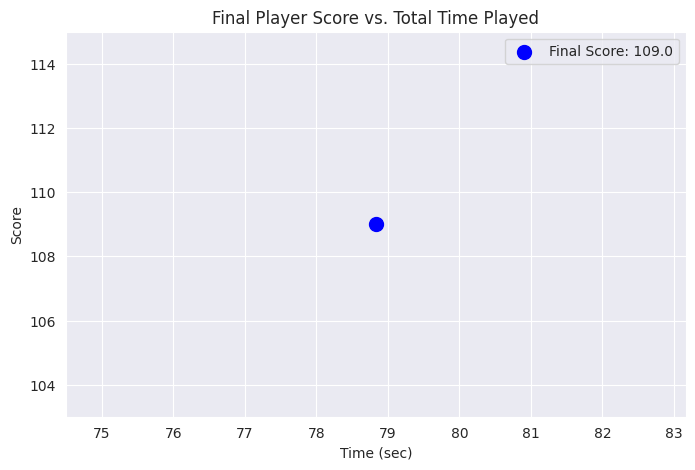

In [5]:
#perfomance analysis
#score over time    graph 1
# The original error was KeyError: 'Time(sec)' because 'Time(sec)' and 'Score' are not direct columns.
# Instead, 'Time Played (sec)' and 'Final Score' are values in the 'Metric' column,
# and their corresponding numerical data is in the 'Value' column.

# Convert 'Value' column to numeric, coercing errors for non-numeric entries
df['Value_numeric'] = pd.to_numeric(df['Value'], errors='coerce')

# Extract 'Time Played (sec)' and 'Final Score'
time_played_sec_df = df[df['Metric'] == 'Time Played (sec)']
final_score_df = df[df['Metric'] == 'Final Score']

# Check if data was found and extract numeric values
time_played_sec = time_played_sec_df['Value_numeric'].iloc[0] if not time_played_sec_df.empty else None
final_score = final_score_df['Value_numeric'].iloc[0] if not final_score_df.empty else None

if time_played_sec is not None and final_score is not None:
    print(f"Time Played: {time_played_sec} seconds")
    print(f"Final Score: {final_score}")

    # Note: A line plot typically requires multiple data points for 'Time' and 'Score'
    # to show a trend. With only one 'Time Played' and 'Final Score', a line plot
    # as originally intended is not meaningful.
    # If the goal is to visualize this single pair, a scatter plot of one point,
    # or a bar chart comparing these two metrics, would be more appropriate than a line plot.

    # Example: A simple scatter plot for the single data point
    plt.figure(figsize=(8, 5))
    plt.scatter(time_played_sec, final_score, color='blue', s=100, label=f'Final Score: {final_score}')
    plt.xlabel('Time (sec)')
    plt.ylabel('Score')
    plt.title('Final Player Score vs. Total Time Played')
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("Could not find 'Time Played (sec)' or 'Final Score' in the DataFrame for plotting.")

In [6]:
# 12) Save personal output and provide download link
out_name = "abdullah_analysis.csv"
df.to_csv(out_name, index=False)
from google.colab import files
files.download(out_name)
print(f"\nSaved and started download: {out_name}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Saved and started download: abdullah_analysis.csv
